<a href="https://colab.research.google.com/github/linegrunwald/QuarentenaDadosAlura/blob/master/QuarentenaDadosEnem2018.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Introdução


Olá, seja bem-vinda e bem-vindo ao notebook da **aula 04!** A partir desta aula iremos analisar e discutir um *sample* da base de dados do **ENEM 2018**. Nessa aula vamos falar sobre diversos temas importantes na área de IA, então **acompanhar esses explicações pela videoaula será importante para o seu desenvolvimento**.

#Aula 4

Aqui iremos explorar e conhecer uma pequena amostra da base de dados do **ENEM 2018**. Esse será o primeiro passo para construir os **modelos de machine learning da aula 05**. Se você quiser estudar o código utilizado para criar o dataset desta aula, pode acessar este [**link aqui**](https://github.com/guilhermesilveira/enem-2018).

Vamos iniciar setando a precisão de casas decimais que o pandas irá exibir os dados (`pd.options.display.float_format`), depois lendo e conhecendo as informações contidas na base de dados.



In [ ]:
import pandas as pd
%precision %.2f
pd.options.display.float_format = '{:,.2f}'.format

uri = "https://github.com/linegrunwald/enem-2018/blob/master/MICRODADOS_ENEM_2018_SAMPLE_43278.csv?raw=true"
dados = pd.read_csv(uri)
dados.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027
0,180009327796,2018,2112209,Timon,21,MA,34.00,M,1.00,1,1,"2,207,702.00",Parnaíba,22.00,PI,1,5,1,3.00,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,1,0,0,0,0,0,0,0,0,...,NaN,1,NaN,NaN,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,B,B,B,B,4,C,A,B,C,A,B,B,A,B,A,B,A,A,B,A,A,C,A,B,B,A,A
1,180012890374,2018,3557105,Votuporanga,35,SP,14.00,M,0.00,1,1,"3,557,105.00",Votuporanga,35.00,SP,4,0,1,nan,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,ADDEDEEBCAADDEDEBECCBAECECEDBAADEABAECDADECDC,0,BCACEEBBBDACEDECAADDDABDBCCACDCBCEDEDABEBEAEA,CDECAABBDDECBEEDBEBBEBEDEEEBCEAEECECCDBDDCACD,CBEDBBBDCBECADBBBECBEAECABDADACDBABCECBBEDADAB...,ADAEDABBCAADBEXEBBDEEADCCCCDACEDDABCBCAAEBBDD,1.00,160.00,120.00,120.00,160.00,120.00,680.00,F,F,A,D,4,N,A,D,D,C,A,B,A,B,A,B,A,A,C,A,B,E,B,D,B,D,D
2,180008223824,2018,2506301,Guarabira,25,PB,20.00,F,0.00,2,1,"2,506,301.00",Guarabira,25.00,PB,1,3,1,1.00,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,ABCBEECAABDDADCACAAAABDDEDACAEEECCDCEBBABBECB,1,BDDEDBCACEBCCACDCDDAECAADBDBCEEAEAABEBEBBACED,CACDDBDDECCEDEEEBCEAEECBBEBEDBEDECBEBDCAABCDE,BBDECBBCDBCECBABDBEDACDDBBBEADECACEDBEBABCBEAE...,ACEADCEBBDADAAEBBDDEDABADBEXCCCDBCAEEACBCDDAB,1.00,120.00,120.00,120.00,120.00,120.00,600.00,E,E,B,B,5,B,A,B,D,A,A,B,A,A,A,B,A,A,B,A,A,D,A,B,B,A,E
3,180007859645,2018,3534807,Ouro Verde,35,SP,17.00,F,0.00,2,1,"3,514,403.00",Dracena,35.00,SP,2,0,1,1.00,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,DEBEBEABDABECACDDDECBBDDBCBBCABDAACCECBABDCDA,0,ACEDEAEAEBECAADABBDBCEDEDDCDDABCCACBCACEBDEBB,ECCBBEBEDBEDBDDAEECDECBECACDEDEECDECAABBDEBCE,BCDEBDBCBBACDCBEAECBABADBBECECBDBBEABDADACEDEC...,EBBDEECCCDACEADCBCAAEBBCBCADAEDABADDADDABDBEX,1.00,100.00,120.00,100.00,80.00,0.00,400.00,B,D,C,C,7,F,A,B,D,B,A,B,B,B,A,A,A,A,B,A,A,E,A,A,A,B,A
4,180013499517,2018,3523107,Itaquaquecetuba,35,SP,19.00,M,0.00,3,1,"3,550,308.00",São Paulo,35.00,SP,1,2,1,1.00,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,0,NaN,NaN,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,F,F,B,D,5,E,A,B,C,B,A,B,A,B,A,A,A,A,B,A,A,D,B,B,B,A,A


In [ ]:
len(dados)

137844

Conheça todas as colunas do nosso dataframe:

In [ ]:
print(dados.columns.values)

['NU_INSCRICAO' 'NU_ANO' 'CO_MUNICIPIO_RESIDENCIA'
 'NO_MUNICIPIO_RESIDENCIA' 'CO_UF_RESIDENCIA' 'SG_UF_RESIDENCIA'
 'NU_IDADE' 'TP_SEXO' 'TP_ESTADO_CIVIL' 'TP_COR_RACA' 'TP_NACIONALIDADE'
 'CO_MUNICIPIO_NASCIMENTO' 'NO_MUNICIPIO_NASCIMENTO' 'CO_UF_NASCIMENTO'
 'SG_UF_NASCIMENTO' 'TP_ST_CONCLUSAO' 'TP_ANO_CONCLUIU' 'TP_ESCOLA'
 'TP_ENSINO' 'IN_TREINEIRO' 'CO_ESCOLA' 'CO_MUNICIPIO_ESC'
 'NO_MUNICIPIO_ESC' 'CO_UF_ESC' 'SG_UF_ESC' 'TP_DEPENDENCIA_ADM_ESC'
 'TP_LOCALIZACAO_ESC' 'TP_SIT_FUNC_ESC' 'IN_BAIXA_VISAO' 'IN_CEGUEIRA'
 'IN_SURDEZ' 'IN_DEFICIENCIA_AUDITIVA' 'IN_SURDO_CEGUEIRA'
 'IN_DEFICIENCIA_FISICA' 'IN_DEFICIENCIA_MENTAL' 'IN_DEFICIT_ATENCAO'
 'IN_DISLEXIA' 'IN_DISCALCULIA' 'IN_AUTISMO' 'IN_VISAO_MONOCULAR'
 'IN_OUTRA_DEF' 'IN_GESTANTE' 'IN_LACTANTE' 'IN_IDOSO'
 'IN_ESTUDA_CLASSE_HOSPITALAR' 'IN_SEM_RECURSO' 'IN_BRAILLE'
 'IN_AMPLIADA_24' 'IN_AMPLIADA_18' 'IN_LEDOR' 'IN_ACESSO' 'IN_TRANSCRICAO'
 'IN_LIBRAS' 'IN_LEITURA_LABIAL' 'IN_MESA_CADEIRA_RODAS'
 'IN_MESA_CADEIRA_SEPARADA' '

Na videoaula tivemos uma discussão muito bacana sobre uma visão geral dos dados e sua organização, e sobre ética na IA. Se você não assistiu eu recomendo que veja, não cabe aqui no notebook reproduzir a conversa, então vamos seguir com o  desenvolvimento.


Conhecidas as informações, vamos chamar o **describe()** para analisá-las. Se atente ao detalhe que o **describe** só gera informação de dados numéricos!

In [ ]:
dados.describe()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,NU_IDADE,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,CO_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,...,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,CO_MUNICIPIO_PROVA,CO_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q005
count,"137,844.00","137,844.00","137,844.00","137,844.00","137,843.00","132,485.00","137,844.00","137,844.00","133,140.00","133,140.00","137,844.00","137,844.00","137,844.00","86,900.00","137,844.00","36,232.00","36,232.00","36,232.00","36,232.00","36,232.00","36,232.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00",...,"137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,838.00","137,838.00","137,838.00","137,838.00","97,537.00","103,774.00","103,774.00","97,537.00","97,537.00","103,774.00","103,774.00","97,537.00","137,844.00","103,774.00","103,774.00","103,774.00","103,774.00","103,774.00","103,774.00","103,774.00","137,844.00"
mean,"180,010,423,553.31","2,018.00","3,118,377.40",31.03,22.38,0.12,2.12,1.04,"3,085,664.65",30.70,1.54,3.00,1.34,1.20,0.10,"31,587,077.66","3,160,970.21",31.45,2.31,1.03,1.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"3,119,912.84",31.05,0.71,0.75,0.75,0.71,448.51,452.52,456.51,460.50,493.63,568.31,526.59,535.18,0.53,1.10,121.73,101.70,97.18,117.03,71.50,509.13,3.90
std,"1,918,950.00",0.00,"994,483.04",9.92,7.61,0.38,1.02,0.23,"975,680.73",9.72,0.72,4.00,0.70,0.60,0.29,"9,765,074.33","979,871.51",9.77,0.78,0.18,0.12,0.03,0.01,0.02,0.02,0.00,0.04,0.02,0.03,0.01,0.01,0.01,0.02,0.03,0.02,0.03,0.00,0.00,0.04,0.01,...,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.01,0.01,0.00,0.00,0.00,0.00,0.01,"994,800.12",9.92,0.46,0.43,0.43,0.46,1.21,1.33,1.31,1.14,74.18,81.03,73.02,102.83,0.50,0.69,31.32,49.51,47.00,35.20,52.21,187.01,1.51
min,"180,007,186,686.00","2,018.00","1,100,015.00",11.00,13.00,0.00,0.00,0.00,"1,100,015.00",11.00,1.00,0.00,1.00,1.00,0.00,"11,000,058.00","1,100,015.00",11.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"1,100,015.00",11.00,0.00,0.00,0.00,0.00,447.00,451.00,455.00,459.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
25%,"180,008,761,760.75","2,018.00","2,409,100.00",24.00,18.00,0.00,1.00,1.00,"2,408,102.00",24.00,1.00,0.00,1.00,1.00,0.00,"24,328,308.00","2,414,407.00",24.00,2.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.

A saída do `describe` traz várias estatísticas, de forma que algumas não fazem sentido ou não nos interessam neste momento.  Entretanto, se você analisou as últimas colunas, viu que lá temos alguns dados relevantes: notas das provas e redação. 

Desafio você a entrar nos detalhes das análises de notas e diversos outros campos! Como nosso tempo aqui é restrito, vamos analisar apenas as notas entre si, mas reflita: Será que existe uma correlação entre as notas? Quem tira notas maiores em redação também vai bem em linguagens?

Vamos analisar!

In [ ]:
colunas_de_notas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']
dados_notas = dados[colunas_de_notas].dropna()
dados_notas.columns = ['ciencias_naturais', 'ciencias_humanas', 'linguagem_codigo', 'matematica', 'redacao']
dados_notas.head()

,ciencias_naturais,ciencias_humanas,linguagem_codigo,matematica,redacao
1,523.10,671.30,661.60,738.00,680.00
2,409.20,531.70,389.00,438.10,600.00
3,452.30,505.50,448.50,544.90,400.00
6,428.50,505.20,521.00,436.80,560.00
8,491.80,575.70,524.40,487.60,660.00


In [ ]:
#quantidade linhas de notas
len(dados_notas)

97270

In [ ]:
dados[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']].query("NU_NOTA_CN.isnull() or NU_NOTA_CH.isnull() or NU_NOTA_LC.isnull() or NU_NOTA_MT.isnull() or NU_NOTA_REDACAO.isnull()", engine='python').sort_values("NU_NOTA_CN", ascending=False)
#dados_notas.loc[dados['TP_PRESENCA_CH'].isin([0, 2]), 'NU_NOTA_CH']

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
129242,667.70,nan,nan,761.50,nan
112857,661.10,nan,nan,768.80,nan
14341,650.00,nan,nan,474.30,nan
115469,638.60,nan,nan,548.10,nan
40788,638.00,nan,nan,753.80,nan
...,...,...,...,...,...
137833,nan,nan,nan,nan,nan
137837,nan,nan,nan,nan,nan
137839,nan,nan,nan,nan,nan
137841,nan,nan,nan,nan,nan


In [ ]:
dados_notas.describe()

,ciencias_naturais,ciencias_humanas,linguagem_codigo,matematica,redacao
count,"97,270.00","97,270.00","97,270.00","97,270.00","97,270.00"
mean,493.69,570.98,528.68,535.23,516.45
std,74.13,78.86,71.83,102.74,184.09
min,0.00,0.00,0.00,0.00,0.00
25%,435.50,514.00,478.00,455.70,360.00
50%,483.60,584.90,533.30,516.60,520.00
75%,542.60,629.70,581.38,600.10,640.00
max,869.60,850.40,781.40,989.90,"1,000.00"


Como queremos analisar as notas detalhadamente, no código acima separamos apenas os dados de interesse. Também removemos todos os valores vazios com o `.dropna()` e trocamos os nomes das colunas para ficar mais legível. 

Por fim, agora nosso DF tem 97270 linhas e 5 colunas.

Agora sim, vamos calcular a correlação usando o `.corr()`:

In [ ]:
 corr = dados_notas.corr()
 corr

,ciencias_naturais,ciencias_humanas,linguagem_codigo,matematica,redacao
ciencias_naturais,1.00,0.57,0.60,0.58,0.51
ciencias_humanas,0.57,1.00,0.70,0.53,0.50
linguagem_codigo,0.60,0.70,1.00,0.57,0.56
matematica,0.58,0.53,0.57,1.00,0.48
redacao,0.51,0.50,0.56,0.48,1.00


Temos vários resultados interessantes por aqui: o primeiro é uma correlação considerável entre **linguagem_codigo e ciencias_humanas**, o que parece fazer sentido. Uma correlação que surpreende é entre **linguagem_codigo e redacao**. Embora haja uma correlação maior em relação às outras matérias e redação, eu esperava um valor ainda maior do que o existente. 

**Mais alguma correlação te chama a atenção? **

Eu tenho mais uma análise das correlações em geral! Repare que as correlações com linguagem_codigos sempre são as maiores e isso me faz pensar em várias hipóteses!

Será que se eu estudar mais português vou ter um desempenho melhor nas outras matérias? (lembre-se que o ENEM é uma prova que demanda interpretação de texto, então essa prerrogativa pode fazer sentido).
Será que se eu considerar provas de anos anteriores e comparar as correlações com linguagem_códigos elas serão maiores?

A verdade é que uma simples análise de correlação nos gera diversas hipóteses. **Se tiver curiosidade e quiser fazer essas análises fica como um desafio extra!**

Na videoaula você viu que tentamos plotar diversos gráficos para visualizar a correlação de uma melhor forma. Abaixo seguem os códigos usados:

## Desafio 1 da [Thais André](https://twitter.com/thais_tandre)

Se a pessoa não teve presença, preencha a nota dela com algum número. A nota 0? A nota média? A mediana?

In [ ]:
dados.query("TP_STATUS_REDACAO==2 and (NU_NOTA_CN.notnull() or NU_NOTA_CH.notnull() or NU_NOTA_LC.notnull() or NU_NOTA_MT.notnull())", engine='python')[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO', 'TP_STATUS_REDACAO']].sort_values("TP_STATUS_REDACAO", ascending=False)


,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,TP_STATUS_REDACAO
1095,448.80,467.50,470.90,570.30,0.00,2.00
91858,543.10,594.20,461.10,413.10,0.00,2.00
104953,nan,545.70,412.10,nan,0.00,2.00
104369,420.90,600.50,506.20,517.20,0.00,2.00
103678,524.70,523.00,469.60,381.50,0.00,2.00
...,...,...,...,...,...,...
44072,391.60,535.70,508.60,449.60,0.00,2.00
43778,490.70,627.20,455.20,470.00,0.00,2.00
42031,449.60,558.50,454.70,395.60,0.00,2.00
41902,577.40,630.20,563.00,509.10,0.00,2.00


In [ ]:
#dados_notas_mediana.query(f"index == dados['TP_PRESENCA_CN'].isin([0, 1]).index")["NU_NOTA_REDACAO"]
dados['TP_PRESENCA_CN'].isin([0, 1])

0         True
1         True
2         True
3         True
4         True
          ... 
137839    True
137840    True
137841    True
137842    True
137843    True
Name: TP_PRESENCA_CN, Length: 137844, dtype: bool

In [ ]:
dados_notas_mediana = dados[colunas_de_notas]

dados_notas_mediana.loc[dados['TP_PRESENCA_CN'].isin([0, 1]), 'NU_NOTA_CN'] = dados[dados['TP_PRESENCA_CN'] == 1]['NU_NOTA_CN'].median()
dados_notas_mediana.loc[dados['TP_PRESENCA_CH'].isin([0, 1]), 'NU_NOTA_CH'] = dados[dados['TP_PRESENCA_CH'] == 1]['NU_NOTA_CH'].median()
dados_notas_mediana.loc[dados['TP_PRESENCA_LC'].isin([0, 1]), 'NU_NOTA_LC'] = dados[dados['TP_PRESENCA_LC'] == 1]['NU_NOTA_LC'].median()
dados_notas_mediana.loc[dados['TP_PRESENCA_MT'].isin([0, 1]), 'NU_NOTA_MT'] = dados[dados['TP_PRESENCA_MT'] == 1]['NU_NOTA_MT'].median()
dados_notas_mediana.loc[dados['TP_STATUS_REDACAO'].isnull(), 'NU_NOTA_REDACAO'] = dados[dados['TP_STATUS_REDACAO'].notnull()]['NU_NOTA_REDACAO'].median()

#dados_notas_mediana.query("(TP_STATUS_REDACAO.isnull())", engine='python')["NU_NOTA_REDACAO"]


dados_notas_mediana.columns = ['ciencias_naturais', 'ciencias_humanas', 'linguagem_codigo', 'matematica', 'redacao']
dados_notas_mediana.head()




/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vie

,ciencias_naturais,ciencias_humanas,linguagem_codigo,matematica,redacao
0,483.50,582.40,531.20,516.50,520.00
1,483.50,582.40,531.20,516.50,680.00
2,483.50,582.40,531.20,516.50,600.00
3,483.50,582.40,531.20,516.50,400.00
4,483.50,582.40,531.20,516.50,520.00


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


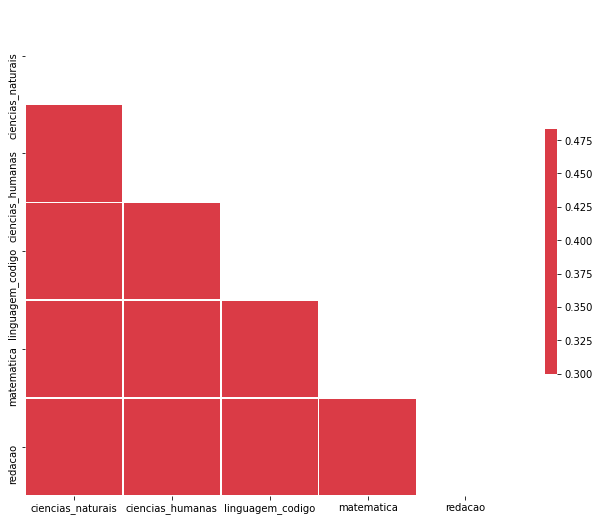

In [ ]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

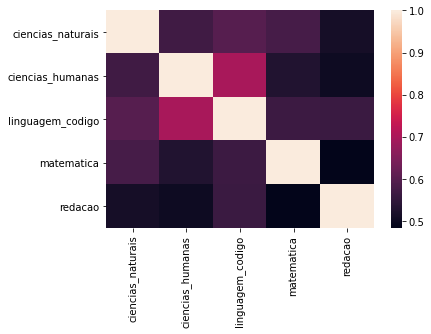

In [ ]:
sns.heatmap(corr)

Depois de apanhar tentando criar boas imagens, resolvemos deixar esse desafio para você kkkkk... Resolva e dê aquela cornetada em nosso time uahuahha...

Ok, nós analisamos e conhecemos a base de dados, mas no final o que vou querer é construir um modelo de ML para fazer as predições de algumas notas. Para criar esse modelo de machine learning devemos analisar a distribuição dos nossos dados e verificar se existe alguma tendência entre eles, facilitando o processo preditivo. 

Então, vamos ao **pairplot**:

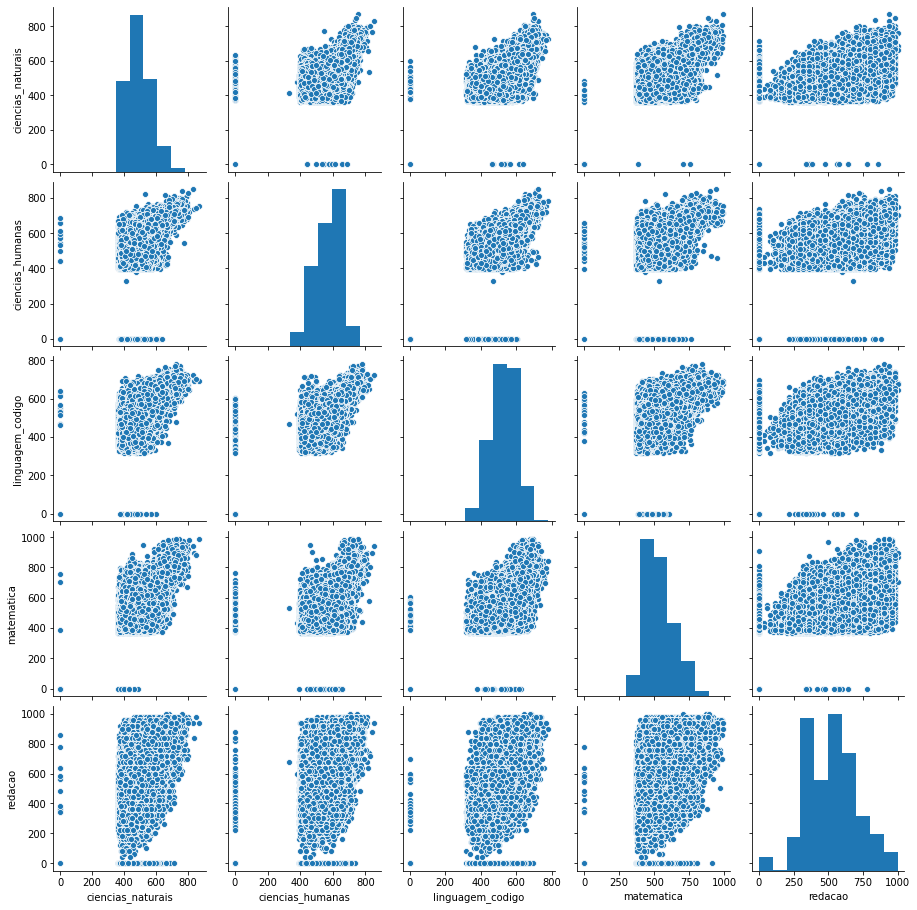

In [ ]:
sns.pairplot(dados_notas)

Embora existam alguns dados com maior dispersão, outros parecem obedecer uma certa tendência. Dessa forma, desenvolver um modelo de ML com resultados razoáveis será complexo, porém possível (para detalhes das análises, acompanhe a discussão na videoaula).

Com isso chegamos ao final de mais uma aula da #quarentenadados. E aí, o que está achando?

Agora iremos entrar em uma área totalmente nova: o desenvolvimento de modelos de machine learning! Espero que você esteja empolgado(a) para conhecer um pouquinho mais sobre esse assunto!

Crie seu próprio notebook, reproduza nossa aula e resolva os desafios que deixamos para você.

Até a próxima aula!


P.S: A partir de agora você irá colocar a mão na massa, nossos desafios serão mais analítcos. Queremos que você vivencie o dia-a-dia de um ciêntista de dados, discutindo suas conclusões no Slack e estudando as análises de outros colegas, por isso não haverá gabarito.

## Desafio 2 do [Thiago Gonçalves](https://twitter.com/tgcsantos)

A matriz de correlação está feiosa, vamos deixar mais bonita? :) Não se esqueça de manter os valores dentro delas.

## Desafio 3 do [Paulo Silveira](https://twitter.com/paulo_caelum)


Pairplot dos acertos de cada categoria (CN, CH, MT, LC, nota pura da redação). Usar o gabarito e as respostas

## Desafio 4 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

Remover todos os zeros. Tomar o cuidado que no desafio 1 já tomamos decisões ligadas a limpeza dos dados também. Você também pode exportar para outro CSV se quiser.

## Desafio 5 do [Thiago Gonçalves](https://twitter.com/tgcsantos)

Quais questões tiveram mais erros (análise sobre o gabarito x acertos x erros)

## Desafio 6 do [Allan Spadini](https://twitter.com/allanspadini)

Estudar o que as pessoas que estudam o assunto estão discutindo e conclusões que já chegaram sobre a utilização de informações (principalmente sensíveis) para machine learning e data science. Podcast do datahackers também sobre o assunto.

#Aula 5

Nessa aula discutiremos o que é o processo de classificação e como as máquinas podem aprender esse processo. Após essa discussão iniciaremos o tratamento dos dados para criar nosso primeiro modelo de ML.

A primeira coisa que devemos fazer é separar os dados que vamos usar como entrada do nosso modelo, dos que precisamos prever:

In [ ]:
dados_notas.head()

,ciencias_naturais,ciencias_humanas,linguagem_codigo,matematica,redacao
1,523.10,671.30,661.60,738.00,680.00
2,409.20,531.70,389.00,438.10,600.00
3,452.30,505.50,448.50,544.90,400.00
6,428.50,505.20,521.00,436.80,560.00
8,491.80,575.70,524.40,487.60,660.00


Vamos usar as notas das provas de ciências naturais, ciências humanas, matemática e redação para prever as notas da prova de linguagem e códigos. 

Como separamos os dados de entrada, também devemos fazer o mesmo com aqueles que precisamos adivinhar.

In [ ]:
x = dados_notas[["ciencias_naturais","ciencias_humanas", "matematica",	"redacao"]]
x

,ciencias_naturais,ciencias_humanas,matematica,redacao
1,523.10,671.30,738.00,680.00
2,409.20,531.70,438.10,600.00
3,452.30,505.50,544.90,400.00
6,428.50,505.20,436.80,560.00
8,491.80,575.70,487.60,660.00
...,...,...,...,...
137835,511.50,606.90,513.40,520.00
137836,465.00,546.80,462.80,580.00
137838,576.20,610.40,486.80,820.00
137840,382.40,534.20,576.40,380.00


In [ ]:
y_adivinhar = dados_notas["linguagem_codigo"]
y_adivinhar

1        661.60
2        389.00
3        448.50
6        521.00
8        524.40
          ...  
137835   504.80
137836   528.50
137838   538.30
137840   468.10
137842   527.70
Name: linguagem_codigo, Length: 97270, dtype: float64

Agora temos os dados que precisamos classificar, mas repare que essa é toda nossa informação! Se eu treinar um modelo com todos esses dados, como eu vou conseguir medir a qualidade do modelo? 

Por isso precisamos dividir nossos dados em dois grupos, um para treino e outro para teste.

Para fazer isso vamos usar métodos da biblioteca Scikit-learn, ela é uma das principais ferramentas no mundo do Machine Learning! Vale conferir e estudar um pouco mais sobre ela, aqui está o [link para a documentação](https://scikit-learn.org/stable/).

Além do Sklearn, iremos utilizar o numpy para setar o seed dos números pseudo-aleatórios.

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

np.random.seed(43267)

#f(x) = y
x_treino, x_teste, y_treino, y_teste =  train_test_split(x,y_adivinhar, random_state = 326784)

print(x_treino.shape)
print(x_teste.shape)
print(y_treino.shape)
print(y_teste.shape)

(72952, 4)
(24318, 4)
(72952,)
(24318,)


In [ ]:
x_treino.head()

,ciencias_naturais,ciencias_humanas,matematica,redacao
25012,610.20,651.90,741.40,660.00
52044,571.70,639.60,639.10,680.00
86543,385.90,569.10,502.00,360.00
36362,424.70,446.20,589.80,420.00
96734,831.40,850.40,943.20,940.00


Feita a divisão dos nossos dados, chegou a hora de criar seu primeiro modelo de Regressão(Em aula discutimos a diferença entre regressão e classificação).

Vamos utilizar o LinearSVR do scikit-learn:

In [ ]:
from sklearn.svm import LinearSVR

modelo = LinearSVR()
modelo.fit(x_treino, y_treino)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=None, tol=0.0001, verbose=0)

## Desafio 1
Explore os parâmetros c e o max_iter. Não há garantias que o resultado será melhor.

Até o momento nós treinamos o modelo apenas com o `.fit()`, mas falta fazer a predição dos resultados. Para realizar a predição chamamos o método `.predict()` do **modelo**.

In [ ]:
predicoes_notas_linguagem = modelo.predict(x_teste)
predicoes_notas_linguagem[:5]

array([591.30581763, 606.46025242, 639.89298788, 555.97651583,
       472.52000416])

Compare a saída da predição com os valores reais logo abaixo, parece que está fazendo sentido, certo?!

In [ ]:
y_teste[:5]

67300    577.20
113766   624.40
48328    703.00
9454     598.60
9515     458.60
Name: linguagem_codigo, dtype: float64

Nos próximos trechos de códigos vamos plotar alguns gráficos! As discussões e todas as análises sobre estas visualizações foram feitas de forma muito rica na videoaula, portanto recomendo fortemente acompanhá-las.

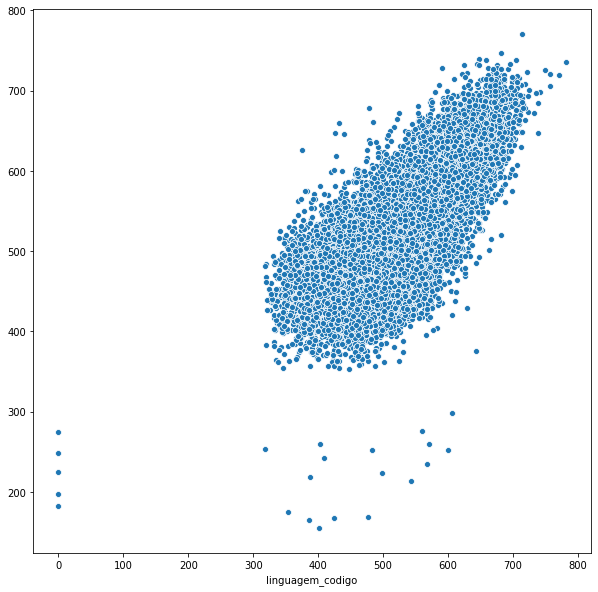

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))

sns.scatterplot(x=y_teste, y=predicoes_notas_linguagem)


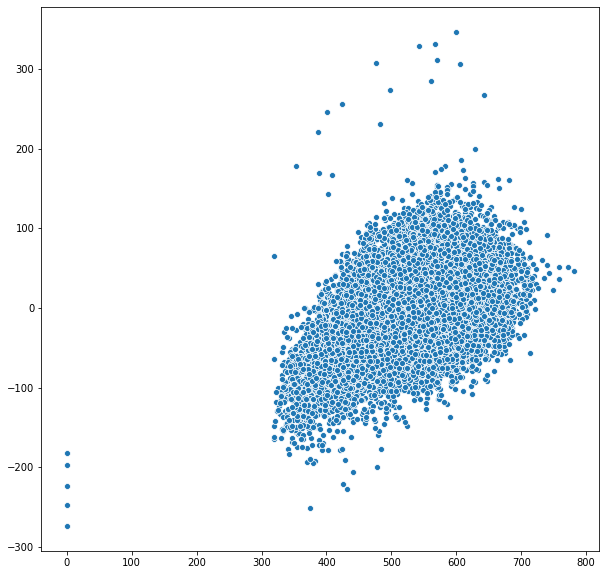

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))

sns.scatterplot(x=y_teste.values, y=y_teste.values - predicoes_notas_linguagem)

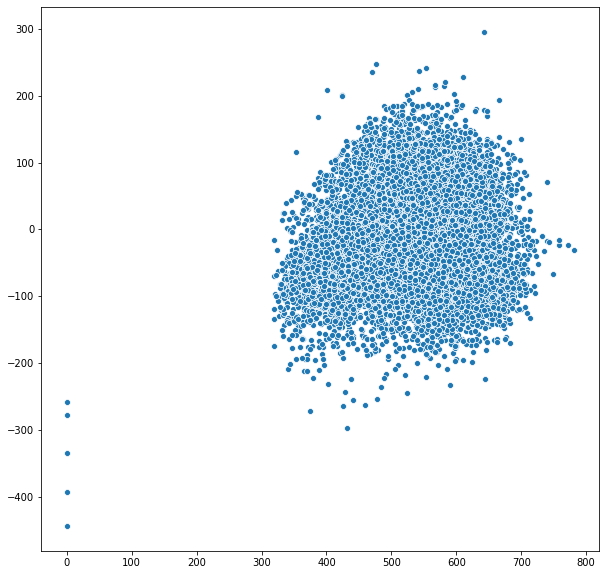

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))

sns.scatterplot(x=y_teste.values, y=y_teste - x_teste.mean(axis=1))

In [ ]:
y_treino.mean()

528.69

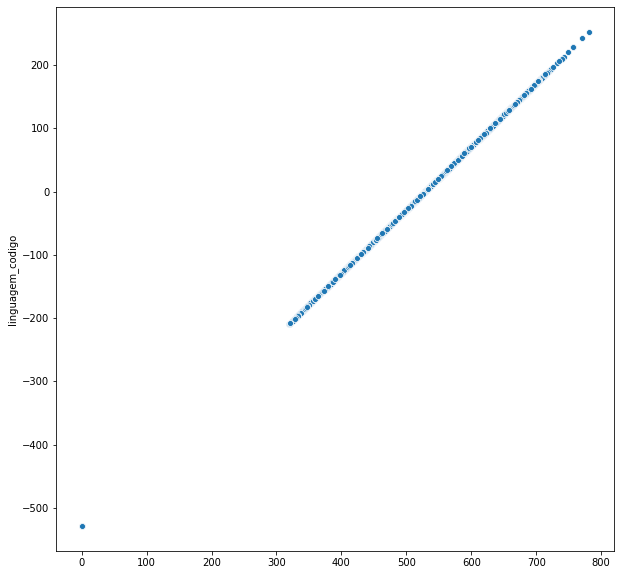

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))

sns.scatterplot(x=y_teste.values, y=y_teste - y_treino.mean())

In [ ]:
###Comentado pois demora muito a execulsão
#from sklearn.svm import SVR

#modelo2 = SVR()
#modelo2.fit(x_treino, y_treino)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

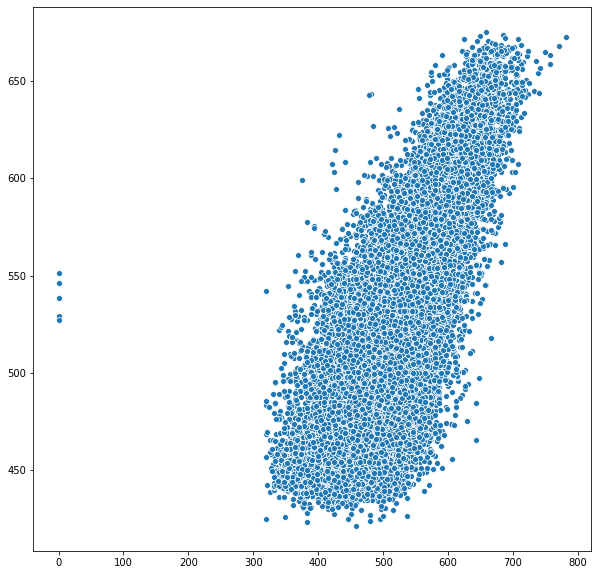

In [ ]:
###Comentado pois demora muito a execulsão
#predicoes_notas_linguagem = modelo2.predict(x_teste)

#plt.figure(figsize=(10,10))

#sns.scatterplot(x=y_teste.values, y=predicoes_notas_linguagem)

Após discutir esses gráficos, vamos criar mais um modelo de **machine learning** basededo em "árvores":

In [ ]:
from sklearn.tree import DecisionTreeRegressor

modelo3 = DecisionTreeRegressor()
modelo3.fit(x_treino, y_treino)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

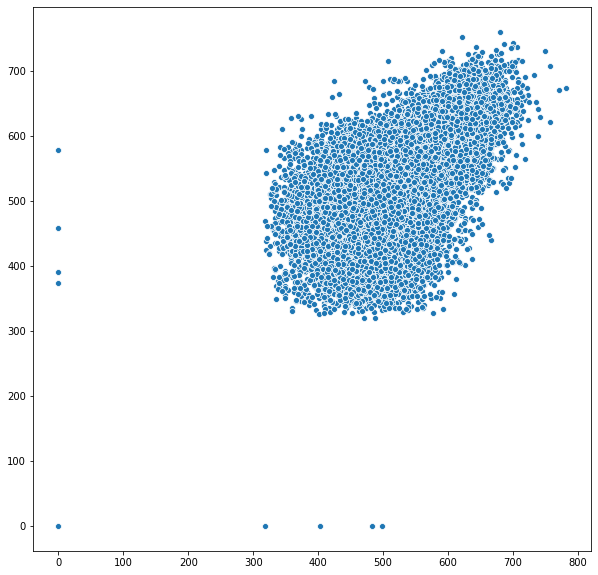

In [ ]:
predicoes_notas_linguagem = modelo3.predict(x_teste)
plt.figure(figsize=(10,10))
sns.scatterplot(x=y_teste.values, y=predicoes_notas_linguagem)

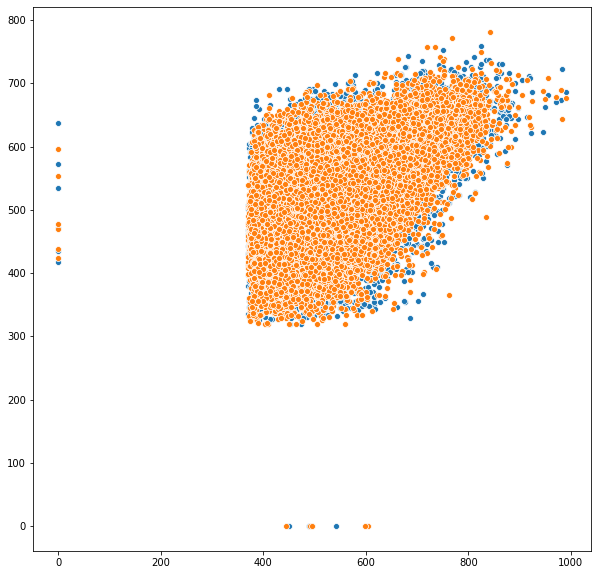

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=x_teste['matematica'].values, y=predicoes_notas_linguagem)
sns.scatterplot(x=x_teste['matematica'].values, y=y_teste.values)

Após treinar o modelo e fazer as predições, plotamos duas imagens. A primeira é muito parecida com as os gráficos do primeiro classificador, mas a segunda mostra os valores reais e valores previstos!

Essa figura é muito interessante e mostra uma sobreposição muito boa entre elas, indicando que nossos resultados fazem sentido.

Avaliar os modelos por imagens é uma forma relevante, mas não resume a informação muito bem, por isso ficaria complexo avaliar dois ou três modelos apenas com gráficos.

## Desafio 2
Plotar no eixo X a média das 4 notas ao invés de uma só

O que precisamos agora é de uma métrica capaz de nos dizer como nosso modelo está indo, aqui vamos usar o [erro quadrático médio](https://pt.wikipedia.org/wiki/Erro_quadr%C3%A1tico_m%C3%A9dio). Existem centenas de métricas de avaliação, tudo vai depender do que você precisa e o que você está prevendo. 

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_teste, predicoes_notas_linguagem)

4163.78

Veja que nosso erro quadrático médio deu em torno dos 4186.22. Embora pelo gráfico nosso modelo pareça muito bom, pela métrica parece ser um pouco alto.

O MSE, sigla em inglês para essá métrica, é uma medida que quanto mais perto de zero melhor. Veja o resultado quando calculamos o MSE de dois vetores iguais:

In [ ]:
mean_squared_error(y_teste, y_teste)

0.00

Nosso resultado é zero! 
Você deve estar se perguntando: meu modelo não está nem perto de zero, será que ele é tão ruim assim?

Nós ainda não temos como te dar essa resposta, precisamos de um critério comparativo, pois assim conseguimos dizer como nosso modelo está indo. Por exemplo, que tal classificar os nossos dados de uma maneira "bobinha"? Para isso temos os chamados métodos **Dummy**.

In [ ]:
from sklearn.dummy import DummyRegressor

modelo_dummy = DummyRegressor()
modelo_dummy.fit(x_treino, y_treino)
dummy_predicoes = modelo_dummy.predict(x_teste)

mean_squared_error(y_teste, dummy_predicoes)

5137.48

## Perguntas do Paulo
- A mediana como dummy vai ser melhor (os zeros puxam média pra baixo)?
- E se tirarmos o zero?
- Temos mil algoritimos, dois mil parâmetros para cada algoritimo. Por melhor que a pessoa seja, o que fazer? Dá pra rodar todos?
- Com todos os parametros?

In [ ]:
#mediana como dummy

modelo_dummy_median = DummyRegressor('median')
modelo_dummy_median.fit(x_treino, y_treino)
dummy_predicoes_median = modelo_dummy_median.predict(x_teste)

mean_squared_error(y_teste, dummy_predicoes_median)

5160.29

Finalmente conseguimos responder se nosso modelo é tão ruim assim! Na realidade nosso modelo não é um dos melhores, temos muito o que melhorar, mas já somos melhores que uma classificação ingênua. 

Com isso, encerramos nossa última aula. Espero que vocês tenham gostado! 

Participem também do nosso **desafio final, valendo um Nintendo Switch**.

Bons estudos e boa sorte!

Forte abraço!

##Desafio 4
E ai, como ficou com o desafio da aula 4, sem os zeros?

## Desafio 5
Interprete tudo que vc fez e a sua conclusão.

## Desafio 6
Calcule as metricas de erro que utilizamos (mean square root error) também no conjunto de treino, e veja o que acontece comparado com o conjunto de teste